Mean squared error: 1178150733.98
R² score: 0.40
ram_gb: 2790.07
ssd: 78.36
hdd: 14.37
graphic_card_gb: 4453.22


/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4557/1075937833.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4557/1075937833.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4557/1075937833.py:18: SettingWithCopyWarning: 
A value is trying to be set o

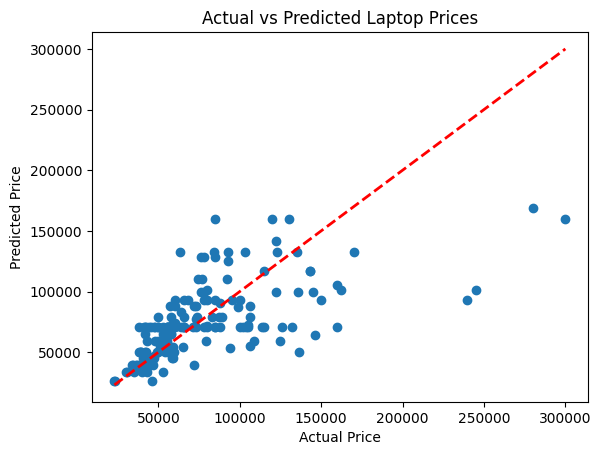

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('laptopPrice.csv')

# Select features and target
X = df[['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']]
y = df['Price']

# Convert ram_gb to numeric by removing 'GB'
X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float) 
X['hdd'] = X['hdd'].str.replace(' GB', '').astype(float)
X['graphic_card_gb'] = X['graphic_card_gb'].str.replace(' GB', '').astype(float)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model performance metrics
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R² score: %.2f' % r2_score(y_test, y_pred))

# Print feature coefficients
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef:.2f}')

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices')
plt.show()
